In [1]:
import pandas as pd
df = pd.read_csv("results.csv")

# Dropping the last column because it's useless
df.drop(df.columns[-1], axis = 1, inplace=True)

In [2]:
df.head()

,num_arch,num_layers,layer_1,layer_2,layer_3,layer_4,best_epoch,best_train_performance,best_test_performance,train_fct
0,1,3,8,10,10,0,15,0.000545,0.000824,trainrp
1,1,3,8,10,10,0,17,0.000585,0.000781,trainscg
2,1,3,8,10,10,0,5,0.000769,0.000993,traincgp
3,1,3,8,10,10,0,5,0.000383,0.000882,trainlm
4,2,4,8,17,3,15,10,0.000749,0.000616,trainrp


In [3]:
# Average train performance and test performance by train function
df.groupby(["train_fct"])[["best_train_performance", "best_test_performance"]].mean()

,best_train_performance,best_test_performance
train_fct,,
traincgp,0.000674,0.000813
trainlm,0.000432,0.000870
trainrp,0.000679,0.000889
trainscg,0.000664,0.000799


In [9]:
df.groupby(["train_fct", "num_layers"], as_index=False)[["best_train_performance", "best_test_performance"]].mean()

,train_fct,num_layers,best_train_performance,best_test_performance
0,traincgp,1,0.000566,0.000744
1,traincgp,2,0.000604,0.000756
2,traincgp,3,0.000791,0.000793
3,traincgp,4,0.000821,0.000837
4,trainlm,1,0.000445,0.000805
5,trainlm,2,0.000394,0.000745
6,trainlm,3,0.000505,0.000896
7,trainlm,4,0.000453,0.000891
8,trainrp,1,0.000628,0.000939
9,trainrp,2,0.000602,0.000888


In [4]:
# add new column
df["range_weights"] = 0


num_inputs = 36
num_outputs = 1

for index, row in df.iterrows():
    num_weights = num_inputs * row['layer_1']\
     +row['layer_1'] * row['layer_2']\
     + row['layer_2'] * row['layer_3']\
     + row['layer_3'] * row['layer_4']\
     + row['layer_4'] * num_outputs

    range_weights = (int(num_weights / 100) + 1) * 100

    df.loc[index, "range_weights"] =  range_weights


df.head()

,num_arch,num_layers,layer_1,layer_2,layer_3,layer_4,best_epoch,best_train_performance,best_test_performance,train_fct,range_weights
0,1,3,8,10,10,0,15,0.000545,0.000824,trainrp,500
1,1,3,8,10,10,0,17,0.000585,0.000781,trainscg,500
2,1,3,8,10,10,0,5,0.000769,0.000993,traincgp,500
3,1,3,8,10,10,0,5,0.000383,0.000882,trainlm,500
4,2,4,8,17,3,15,10,0.000749,0.000616,trainrp,600


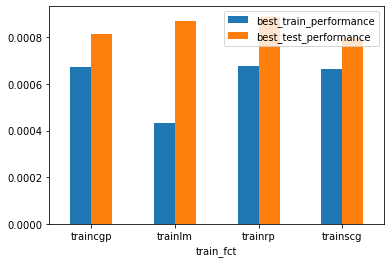

In [10]:
a = df.groupby([ "train_fct"])[["best_train_performance", "best_test_performance"]].mean()

s = a.plot.bar(rot=0).get_figure()

s.savefig("stats/fct_perf.png")

<AxesSubplot:xlabel='num_layers'>

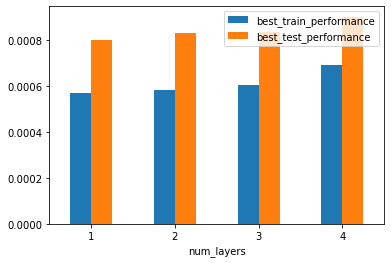

In [16]:
a = df.groupby([ "num_layers"])[["best_train_performance", "best_test_performance"]].mean()

a.plot.bar(rot=0)

<AxesSubplot:xlabel='train_fct,num_layers'>

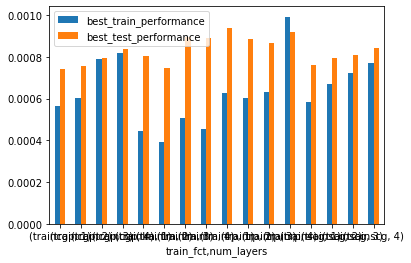

In [12]:
a = df.groupby([ "train_fct", "num_layers"])[["best_train_performance", "best_test_performance"]].mean()

a.plot.bar(rot=0)

In [18]:
a = df.sort_values(by=['best_test_performance']).head(n=10)
a.drop(["best_epoch", "range_weights", "num_arch"], axis=1, inplace=True)

a.to_csv("stats/10_best_arch.csv", index = False)

a



,num_layers,layer_1,layer_2,layer_3,layer_4,best_train_performance,best_test_performance,train_fct
323,4,6,17,12,11,0.000695,0.000445,trainlm
117,2,12,15,0,0,0.000588,0.000468,trainscg
184,3,16,12,3,0,0.000160,0.000515,trainrp
290,1,17,0,0,0,0.000665,0.000518,traincgp
387,3,15,5,4,0,0.000638,0.000539,trainlm
89,1,3,0,0,0,0.000574,0.000541,trainscg
239,2,6,4,0,0,0.000371,0.000548,trainlm
176,1,19,0,0,0,0.000403,0.000550,trainrp
385,3,15,5,4,0,0.000661,0.000551,trainscg
187,3,16,12,3,0,0.000503,0.000566,trainlm
